In [1]:
!pip install folium
!pip install geocoder

In [12]:
import pandas as pd
import numpy as np
import requests 
from pandas.io.json import json_normalize 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium
import geocoder


In [3]:
#Reading data
#Dataset Source: https://www.kaggle.com/shrutimehta/zomato-restaurants-data
df = pd.read_csv('D:\zomato.csv',encoding='ISO-8859-1')
print(df.shape)
df.head()

(9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#Exploring the dataset columns and types
print(df.columns)
print(df.dtypes)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color       

In [5]:
#Exploring the countries counts in the dataset
pd.set_option('display.max_rows', None)

print(df['City'].value_counts())

New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Amritsar                    21
Guwahati                    21
Ahmedabad                   21
Lucknow                     21
London                      20
Athens                      20
Wellington City             20
Davenport                   20
Pensacola                   20
Ranchi                      20
Tampa Bay                   20
Jaipur                      20
Puducherry                  20
Kanpur                      20
Abu Dhabi                   20
Mangalore                   20
Rio de Janeiro              20
Sharjah                     20
Colombo                     20
Vadodara                    20
Dubai                       20
Pretoria                    20
Valdosta                    20
Mysore                      20
Nagpur                      20
Ankara                      20
Mumbai  

In [16]:
#Filtering
condition = df['Country Code'] == 215 #Britain
df_britain =  df[condition]
df_britain.reset_index(drop=True, inplace=True)
print(df_britain.shape)
df_britain.head()

(80, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6900714,Pepe's Piri Piri,215,Birmingham,"254-256 Alum Rock Road, Alum Rock, Birmingham ...",Alum Rock,"Alum Rock, Birmingham",-1.846811,52.488557,Fast Food,...,Pounds(£),No,No,No,No,1,2.8,Orange,Average,26
1,6900883,Ju Ju's Cafe,215,Birmingham,"1 Canal Square, Brindleyplace, Birmingham B16 8EH",Brindleyplace,"Brindleyplace, Birmingham",-1.918049,52.477569,"Cafe, British",...,Pounds(£),No,No,No,No,1,3.7,Yellow,Good,13
2,6900374,Bank,215,Birmingham,"4 Brindleyplace, Brindleyplace, Birmingham B1 2JB","Brindleyplace, Broad Street","Brindleyplace, Broad Street, Birmingham",-1.914805,52.477693,"British, Steak",...,Pounds(£),Yes,No,No,No,3,4.0,Green,Very Good,133
3,6900224,Chaophraya,215,Birmingham,"Middle Mall, Bullring Shopping Centre, Special...","Bullring Shopping Centre, Southside","Bullring Shopping Centre, Southside, Birmingham",-1.894286,52.477633,Thai,...,Pounds(£),Yes,No,No,No,2,3.9,Yellow,Good,22
4,6900160,Handmade Burger Co.,215,Birmingham,"Unit 3, St Martin Square, Bullring Shopping Ce...","Bullring Shopping Centre, Southside","Bullring Shopping Centre, Southside, Birmingham",-1.894286,52.477633,"Burger, American",...,Pounds(£),No,No,No,No,2,3.7,Yellow,Good,21


In [17]:
#Cleaning the dataset
condition = df_britain.Longitude !=0.000000
df_britain= df_britain[condition]

df_britain = df_britain[['Restaurant Name','Locality','City','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

print(df_britain.shape)

df_britain.head()

(80, 9)


,Restaurant Name,Locality,City,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Pepe's Piri Piri,Alum Rock,Birmingham,-1.846811,52.488557,Fast Food,2.8,Average,26
1,Ju Ju's Cafe,Brindleyplace,Birmingham,-1.918049,52.477569,"Cafe, British",3.7,Good,13
2,Bank,"Brindleyplace, Broad Street",Birmingham,-1.914805,52.477693,"British, Steak",4.0,Very Good,133
3,Chaophraya,"Bullring Shopping Centre, Southside",Birmingham,-1.894286,52.477633,Thai,3.9,Good,22
4,Handmade Burger Co.,"Bullring Shopping Centre, Southside",Birmingham,-1.894286,52.477633,"Burger, American",3.7,Good,21


In [18]:
print(df_britain.shape)

(80, 9)


<h1>1. Geo-Exploration of Restaurants Clusters in Britain</h1>

In [67]:
#Training K-Means Clustering Model
X = np.stack((df_britain['Latitude'], df_britain['Longitude']), axis=1)
model = KMeans(n_clusters=4, random_state=0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [69]:
clusters = model.labels_
colors = ['red', 'green', 'blue', 'yellow']
df_britain ['Cluster'] = clusters

map_britain = folium.Map(location=[52.3555, 1.1743], zoom_start=5)

for latitude, longitude, Locality, cluster in zip(df_britain['Latitude'], df_britain['Longitude'], df_britain['Locality'], df_britain['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_britain)  

map_britain

<h1>2. Cities of Top-Rated Restaurants in Britain <h1>

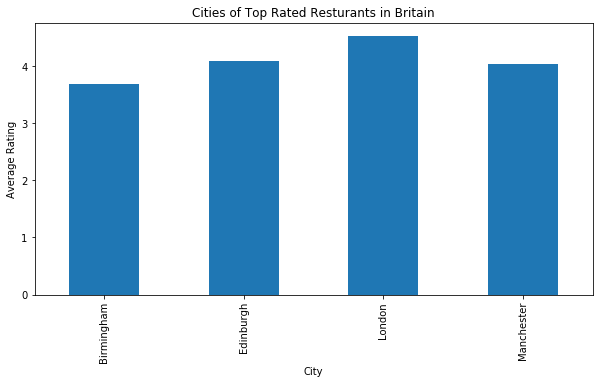

In [58]:
plt.figure(figsize=(10,5))

df_britain.groupby('City')['Aggregate rating'].mean().plot(kind='bar')

plt.title('Cities of Top Rated Resturants in Britain')
plt.xlabel('City')
plt.ylabel('Average Rating')

plt.show()

<h1>3. Where are the Top-Rated Restaurants in London? </h1>

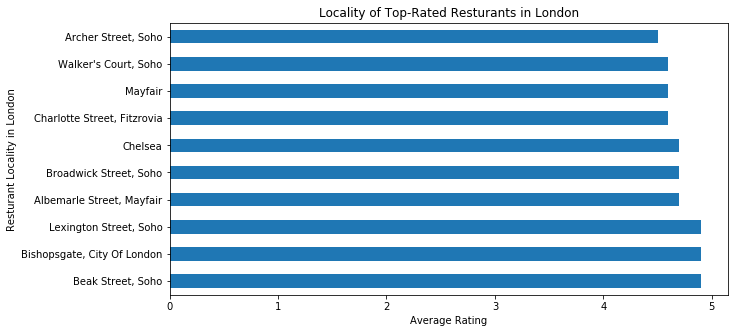

In [66]:
plt.figure(figsize=(10,5))

df_britain[df_britain.City=="London"].groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='barh')

plt.title('Locality of Top-Rated Resturants in London')
plt.xlabel('Average Rating')
plt.ylabel('Resturant Locality in London')


plt.show()

<h1>4. Where are the Lowest Rated Restaurants in London? </h1>

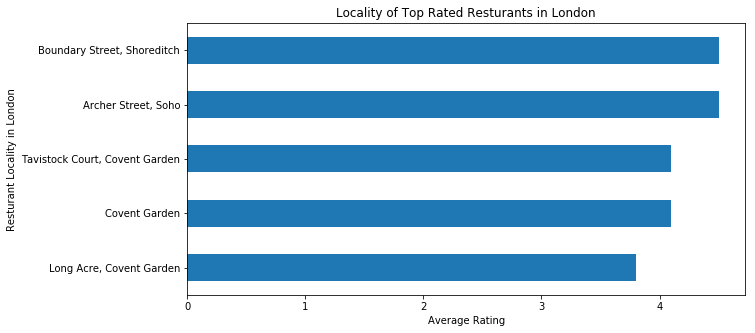

In [64]:
plt.figure(figsize=(10,5))

df_britain[df_britain.City=="London"].groupby('Locality')['Aggregate rating'].mean().nsmallest(5).plot(kind='barh')

plt.title('Locality of Top Rated Resturants in London')
plt.ylabel('Resturant Locality in London')
plt.xlabel('Average Rating')

plt.show()

<h1>5. Where are the best Indian restaurants in London? </h1>

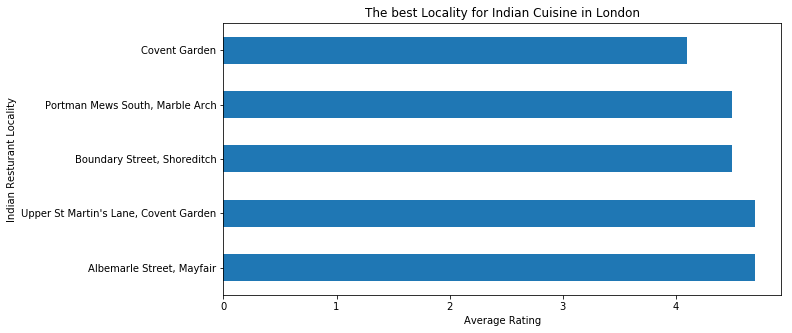

In [65]:
plt.figure(figsize=(10,5))

condition = (df_britain.City=="London") & (df_britain.Cuisines.str.contains("Indian"))
df_britain[condition].groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='barh')

plt.title('The best Locality for Indian Cuisine in London')
plt.xlabel('Average Rating')
plt.ylabel('Indian Resturant Locality')


plt.show()